# Data Labeling

In [19]:
import os
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import sys
import pandas as pd


In [5]:
def unzip(zip_file, destination):
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(destination)

def list_files(destination):
    files = []
    for root, _, filenames in os.walk(destination):
        for filename in filenames:
            files.append(os.path.join(root, filename))
    return files

def display_file_types(files):
    file_types = set()
    for file_path in files:
        _, file_extension = os.path.splitext(file_path)
        file_types.add(file_extension.lower())
    return file_types


In [48]:

# Example usage:
zip_file = "Dataset\SMS PHISHING DATASET FOR MACHINE LEARNING AND PATTERN RECOGNITION\Dataset_5971.zip"
destination_folder = "unzipped_dataset_SMS"

if os.path.exists(zip_file):
    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)

    unzip(zip_file, destination_folder)
    print(f"Successfully unzipped '{zip_file}' to '{destination_folder}'.")

    extracted_files = list_files(destination_folder)
    print("\nList of extracted files:")
    for file_path in extracted_files:
        print(file_path)

    file_types = display_file_types(extracted_files)
    print("\nUnique file types:")
    for file_type in file_types:
        print(file_type)
else:
    print(f"Error: ZIP file '{zip_file}' not found. Displaying contents of '{destination_folder}':")
    folder_contents = os.listdir(destination_folder)
    for item in folder_contents:
        print(os.path.join(destination_folder, item))

Successfully unzipped 'Dataset\SMS PHISHING DATASET FOR MACHINE LEARNING AND PATTERN RECOGNITION\Dataset_5971.zip' to 'unzipped_dataset_SMS'.

List of extracted files:
unzipped_dataset_SMS\Dataset_5971.csv

Unique file types:
.csv


In [49]:
def load_labeld_spam_dataset():
    base_path = './unzipped_dataset_SMS/'
    csv_files = [os.path.join(base_path, csv) for csv in os.listdir(base_path)]
    dfs = [pd.read_csv(filename) for filename in csv_files]
    df = pd.concat(dfs)
    df = df.sample(frac=1, random_state=777)
    df = df.rename(columns={
        'TEXT':'text', 'EMAIL':'email', 'LABEL':'label'
        })
    return df.reset_index()

df_labeled = load_labeld_spam_dataset()

In [50]:
df_labeled.head()

,index,label,text,URL,email,PHONE
0,2458,ham,Please tell me you have some of that special s...,No,No,No
1,2019,ham,Do whatever you want. You know what the rules ...,No,No,No
2,5796,ham,wiskey Brandy Rum Gin Beer Vodka Scotch Shampa...,No,No,No
3,2467,ham,I send the print outs da.,No,No,No
4,5167,ham,Mmmmm ... It was sooooo good to wake to your w...,No,No,No


In [94]:
unique_labels = df_labeled['label'].unique()
print("Unique labels:", unique_labels)

Unique labels: ['ham' 'Smishing' 'spam' 'smishing' 'Spam']


Value counts for each class:

label
ham         4844
Smishing     616
spam         466
Spam          23
smishing      22
Name: count, dtype: int64



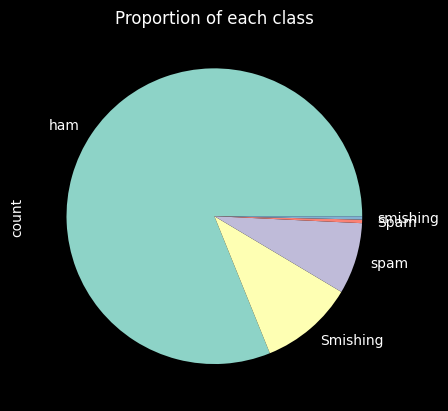

In [51]:
# Set a dark background style
plt.style.use('dark_background')

# Print actual value count
print(f"Value counts for each class:\n\n{df_labeled.label.value_counts()}\n")

# Display pie chart to visually check the proportion
df_labeled.label.value_counts().plot.pie(y='label', title='Proportion of each class')

plt.show()

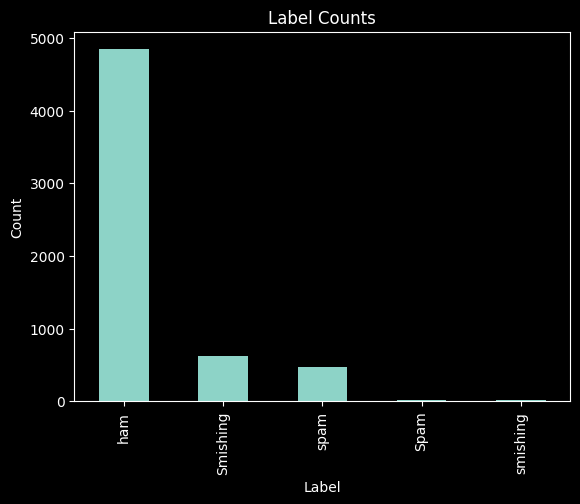

In [52]:
# Plot label counts using Pandas
df_labeled['label'].value_counts().plot(kind='bar', title='Label Counts')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [112]:
def convert_labels_to_integers(dataframe, column_name):
    # Get unique labels from the specified column
    unique_labels = dataframe[column_name].unique()

    # Convert unique string labels to integers
    label_mapping, integer_labels = pd.factorize(dataframe[column_name])
    
    # Return the label mapping for reference if needed
    return label_mapping, integer_labels

In [114]:
# Convert labels to integers using the function
label_mapping, _ = convert_labels_to_integers(df_labeled, 'label')

df_labeled_mapping = df_labeled.copy() 
df_labeled_mapping['label']= label_mapping

# Print the DataFrame with integer labels
print("DataFrame with Integer Labels:")
print(df_labeled_mapping.head())

# Print the label mapping for reference
print("\nLabel Mapping:")
print(label_mapping)

DataFrame with Integer Labels:
   label                                               text
0      0  Please tell me you have some of that special s...
1      0  Do whatever you want. You know what the rules ...
2      0  wiskey Brandy Rum Gin Beer Vodka Scotch Shampa...
3      0                         I send the print  outs da.
4      0  Mmmmm ... It was sooooo good to wake to your w...

Label Mapping:
[0 0 0 ... 0 0 0]


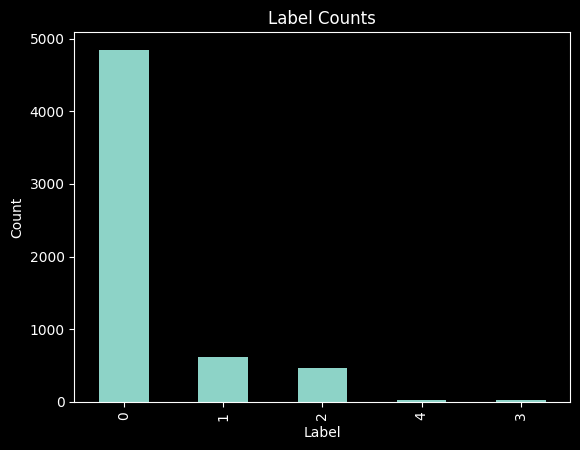

In [116]:
# Plot label counts using Pandas
df_labeled_mapping['label'].value_counts().plot(kind='bar', title='Label Counts')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [117]:
df_labeled = df_labeled_mapping.drop(['index','URL','email','PHONE'], axis=1)

KeyError: "['index', 'URL', 'email', 'PHONE'] not found in axis"

In [118]:
df_labeled_mapping.head()

,label,text
0,0,Please tell me you have some of that special s...
1,0,Do whatever you want. You know what the rules ...
2,0,wiskey Brandy Rum Gin Beer Vodka Scotch Shampa...
3,0,I send the print outs da.
4,0,Mmmmm ... It was sooooo good to wake to your w...


In [119]:
from sklearn.model_selection import train_test_split

X = df_labeled_mapping.drop('label',axis=1)
y = df_labeled_mapping['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f'There are {X_train.shape[0]} comments for training.')
print(f'There are {X_test.shape[0]} comments for testing')

There are 4776 comments for training.
There are 1195 comments for testing


<Axes: title={'center': 'testing classes'}, xlabel='label'>

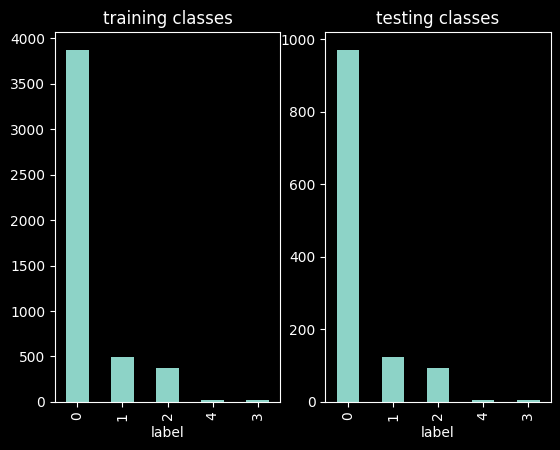

In [120]:
plt.subplot(1,2,1)
y_train.value_counts().plot.bar(y='label', title='training classes')

plt.subplot(1,2,2)
y_test.value_counts().plot.bar(y='label', title='testing classes')

In [121]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1,5))

In [122]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB

def calculate_accuracy(X_tr, y_tr, X_te=X_test, y_te=y_test,
                       clf=MultinomialNB(), vectorizer=vectorizer):
    X_train_vect = vectorizer.fit_transform(X_tr.text.tolist())
    clf.fit(X=X_train_vect, y=y_tr)
    
    X_test_vect = vectorizer.transform(X_te.text.tolist())
    preds = clf.predict(X_test_vect)
    
    return accuracy_score(preds, y_te)

In [123]:
accs = dict()

In [124]:
true_acc = calculate_accuracy(X_train, y_train)
accs['true_labels'] = true_acc

print("Accuracy for {} is {:.2f}%".format('true_labelling', true_acc*100))

Accuracy for true_labelling is 94.73%


In [125]:
# Calculate random labels
rnd_labels = np.random.randint(0, 2, X_train.shape[0])

# Feed them alongside X_train to calculate_accuracy function
rnd_acc = calculate_accuracy(X_train, rnd_labels)

rnd_acc

0.4635983263598326

In [126]:
# Empty list to save accuracies
rnd_accs = []

for _ in range(10):
    # Add every accuracy to the list
    rnd_accs.append(calculate_accuracy(X_train, np.random.randint(0, 2, X_train.shape[0])))

# Save result in accs dictionary
accs['random-labels'] = sum(rnd_accs)/len(rnd_accs)

# Print result
print(f"The random labelling method achieved and accuracy of {accs['random-labels']*100:.2f}%")

The random labelling method achieved and accuracy of 46.45%


In [133]:
def labeling_rules_1(x):
    
    # Convert text to lowercase
    x = x.lower()
    
    # Define list of rules
    rules = [
        "free" in x,
        "subs" in x,
        "http" in x,
        "wake" in x
    ]
    
    # If the comment falls under any of the rules classify as SPAM
    if any(rules):
        return 1
    
    # Otherwise, NO_LABEL
    return -1

In [134]:
# Apply the rules the comments in the train set
labels = [labeling_rules_1(label) for label in X_train.text]

# Convert to a numpy array
labels = np.asarray(labels)

# Take a look at the automatic labels
labels

array([-1, -1, -1, ..., -1, -1, -1])

In [135]:
# Create the automatic labeled version of X_train by removing points with NO_LABEL label
X_train_al = X_train[labels != -1]

# Remove predictions with NO_LABEL label
labels_al = labels[labels != -1]

print(f"Predictions with concrete label have shape: {labels_al.shape}")

print(f"Proportion of data points kept: {labels_al.shape[0]/labels.shape[0]*100:.2f}%")

Predictions with concrete label have shape: (382,)
Proportion of data points kept: 8.00%


In [136]:
# Compute accuracy when using these labels
iter_1_acc = calculate_accuracy(X_train_al, labels_al)

# Display accuracy
print(f"First iteration of automatic labeling has an accuracy of {iter_1_acc*100:.2f}%")

# Save the result
accs['first-iteration'] = iter_1_acc

First iteration of automatic labeling has an accuracy of 10.29%


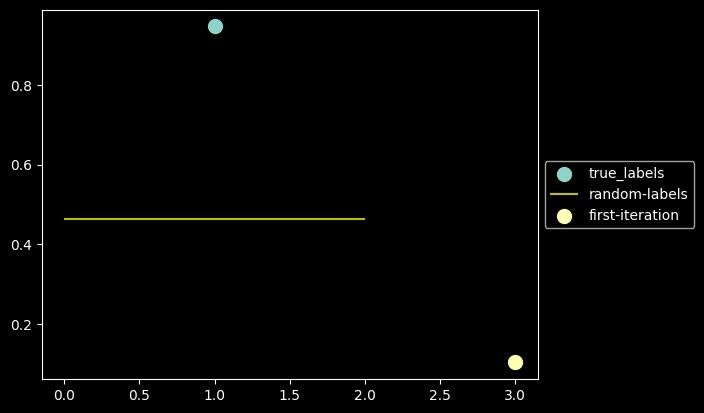

In [131]:
def plot_accuracies(accs=accs):
    colors = list("rgbcmy")
    items_num = len(accs)
    cont = 1

    for x, y in accs.items():
        if x in ['true-labels', 'random-labels', 'true-labels-best-clf']:
            plt.hlines(y, 0, (items_num-2)*2, colors=colors.pop())
        else:
            plt.scatter(cont, y, s=100)
            cont+=2
    plt.legend(accs.keys(), loc="center left",bbox_to_anchor=(1, 0.5))
    plt.show()
    
plot_accuracies()

In [138]:
def label_given_rules(df, rules_function, name, 
                      accs_dict=accs, verbose=True):
    
    # Apply labeling rules to the comments
    labels = [rules_function(label) for label in df.text]
    
    # Convert to a numpy array
    labels = np.asarray(labels)
    
    # Save initial number of data points
    initial_size = labels.shape[0]
    
    # Trim points with NO_LABEL label
    X_train_al = df[labels != -1]
    labels = labels[labels != -1]
    
    # Save number of data points after trimming
    final_size = labels.shape[0]
    
    # Compute accuracy
    acc = calculate_accuracy(X_train_al, labels)
    
    # Print useful information
    if verbose:
        print(f"Proportion of data points kept: {final_size/initial_size*100:.2f}%\n")
        print(f"{name} labeling has an accuracy of {acc*100:.2f}%\n")
        
    # Save accuracy to accuracies dictionary
    accs_dict[name] = acc
    
    return X_train_al, labels, acc

In [137]:
def labeling_rules_2(x):
    
    # Convert text to lowercase
    x = x.lower()
    
    # Define list of rules to classify as NOT_SPAM
    not_spam_rules = [
        "view" in x,
        "song" in x
    ]
    
    # Define list of rules to classify as SPAM
    spam_rules = [
        "free" in x,
        "subs" in x,
        "gift" in x,
        "follow" in x,
        "http" in x
    ]
    
    # Classify depending on the rules
    if any(not_spam_rules):
        return 0
    
    if any(spam_rules):
        return 1
    
    return -1

Proportion of data points kept: 8.46%

second-iteration labeling has an accuracy of 10.88%



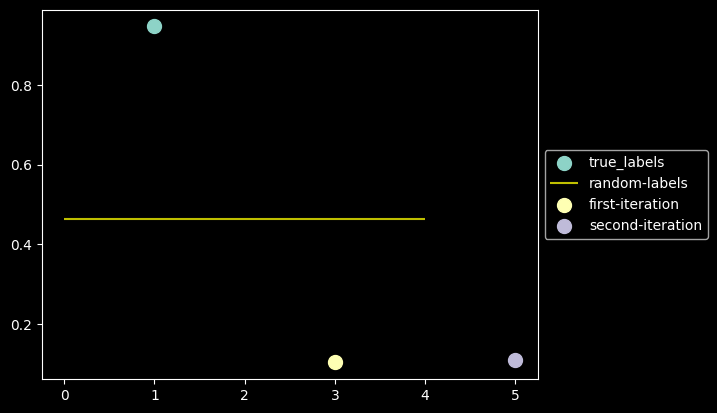

In [139]:
label_given_rules(X_train, labeling_rules_2, "second-iteration")

plot_accuracies()

In [142]:
from statistics import mean

print(f"HARM comments have an average of {mean([len(t) for t in df_labeled_mapping[df_labeled_mapping.label==0].text]):.2f} characters.")
print(f"Smishing comments have an average of {mean([len(t) for t in df_labeled_mapping[df_labeled_mapping.label==1].text]):.2f} characters.")

HARM comments have an average of 70.70 characters.
Smishing comments have an average of 139.97 characters.


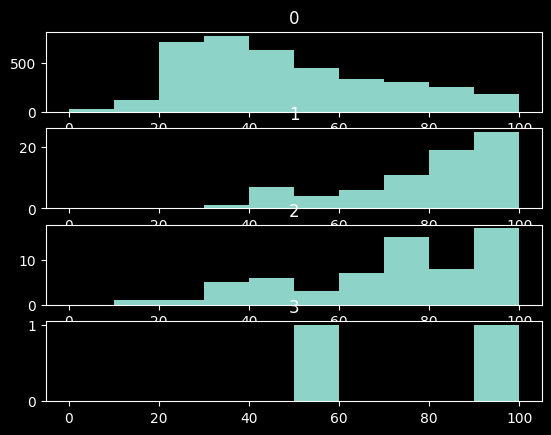

In [155]:
for i in range(0,4):
    plt.subplot(4,1,i+1)
    plt.hist([len(t) for t in df_labeled_mapping[df_labeled_mapping.label==i].text], range=(0,100))
    plt.title(i)

In [152]:
import pandas as pd

def most_popular_words_per_label(dataframe, label_column='label', text_column='text', top_n=5):
    result = []

    # Group the DataFrame by label
    grouped = dataframe.groupby(label_column)

    for label, group in grouped:
        # Concatenate text from all rows in the group
        combined_text = ' '.join(group[text_column])

        # Tokenize the text (you may need to use a more sophisticated tokenizer)
        words = combined_text.split()

        # Count the occurrences of each word
        word_counts = pd.Series(words).value_counts()

        # Get the top N most popular words
        top_words = word_counts.head(top_n)

        # Append the label and top words to the result
        result.append({'label': label, 'top_words': top_words})

    return result

# Find most popular words per label using the function
result = most_popular_words_per_label(df_labeled_mapping, 'label', 'text', top_n=5)

# Print the result
for entry in result:
    print(f"Label {entry['label']}:")
    print(entry['top_words'])
    print()


Label 0:
to     1541
you    1461
I      1454
the    1030
a       962
Name: count, dtype: int64

Label 1:
to      433
a       339
call    225
your    211
you     208
Name: count, dtype: int64

Label 2:
to      405
a       154
the     133
for     123
your    116
Name: count, dtype: int64

Label 3:
a       10
to       9
or       8
you      7
Call     6
Name: count, dtype: int64

Label 4:
to      15
a        8
and      6
your     6
the      6
Name: count, dtype: int64



In [156]:
def labeling_rules_3(x):
    
    # Convert text to lowercase
    x = x.lower()
    
    # Define list of rules to classify as NOT_SPAM
    HARM_RULE = [
        "to" in x,
        "a" in x,
        "call" in x,
        "your" in x,
        "you" in x
    ]
    SMASHING_rules = [
        "view" in x,
        "song" in x,
        len(x) > 60
    ]
    

    # Define list of rules to classify as SPAM
    HARM_rules = [
        "free" in x,
        "subs" in x,
        "gift" in x,
        "follow" in x,
        "http" in x,
        "check out" in x,
        len(x) <60
    ]
    
    label_2_rule = [
        "the" in x
    ]
    
    # Classify depending on the rules
    if any(HARM_RULE):
        return 0
    
    if any(SMASHING_rules):
        return 1
    
    if any(label_2_rule):
        return 2
        
    return 3

Proportion of data points kept: 100.00%

third-iteration labeling has an accuracy of 81.17%



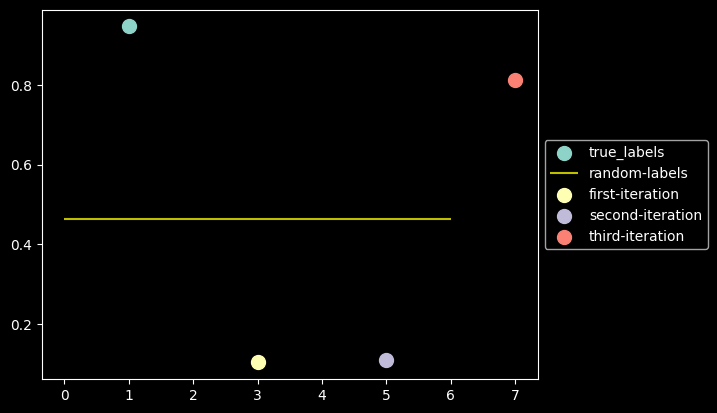

In [157]:
label_given_rules(X_train, labeling_rules_3, "third-iteration")

plot_accuracies()

In [158]:
# Configure pandas to print out all rows to check the complete dataset
pd.set_option('display.max_rows', None)

# Check NOT_SPAM comments
df_labeled[df_labeled.label==0]

,label,text
